In [3]:
import numpy as np
import json
import matplotlib.pylab as plt
import sys
from PIL import Image
from keras import models, layers

In [30]:
def test_Image(addr,table,model):
    T_Image = Image.open(addr)
    T_Image = T_Image.resize((32,32))
    T_Image_Array = np.array(T_Image,'uint8')
    plt.imshow(T_Image_Array)
    print(T_Image_Array.size)
    # T_Image_Array = T_Image_Array.reshape(1,32,32,3)
    a = model.predict(T_Image_Array)
    b = np.argmax(a,axis=1)
    print('예측한 음절: ',table[str(b[0])])

In [35]:
CNN = models.load_model('D:\AA_develop\parsing\models\Korean_CNN_model(97.8).h5')
print(CNN.summary())
with open('D:\AA_develop\parsing\models\index_to_syllable(97.8).json','r',encoding='utf-8') as f:
    index_to_syllable = json.load(f)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 256)         0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 512)         1180160   
                                                                 
 flatten_9 (Flatten)         (None, 8192)             

1024
111


ValueError: in user code:

    File "d:\AA_develop\parsing\myenv_310\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "d:\AA_develop\parsing\myenv_310\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\AA_develop\parsing\myenv_310\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "d:\AA_develop\parsing\myenv_310\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "d:\AA_develop\parsing\myenv_310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\AA_develop\parsing\myenv_310\lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_9' (type Sequential).
    
    Input 0 of layer "conv2d_25" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (32, 32)
    
    Call arguments received by layer 'sequential_9' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 32), dtype=uint8)
      • training=False
      • mask=None


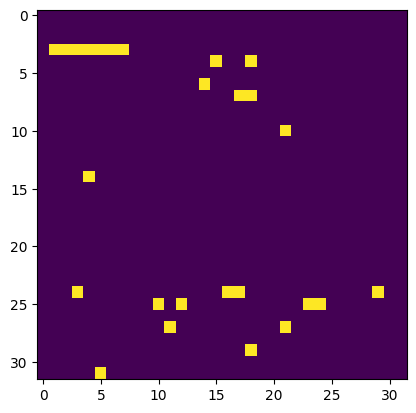

In [33]:
addr = 'D:\AA_develop\parsing\images\개정도_표지2\개정도_표지2_0.png'
test_Image(addr, index_to_syllable, CNN)

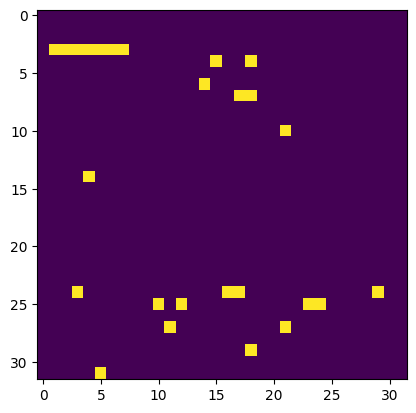

In [27]:
addr = 'D:\AA_develop\parsing\images\개정도_표지2\개정도_표지2_0.png'
T_Image = Image.open(addr)
T_Image = T_Image.resize((32,32))
T_Image_Array = np.array(T_Image,'uint8')
plt.imshow(T_Image_Array)

In [29]:
T_Image_Array.shape

(32, 32)